In [1]:
#!/usr/bin/python
#  -*- coding:utf-8 -*-

import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib as mpl
from pprint import pprint

In [2]:
def restore1(sigma, u, v, K):  # 奇异值、左特征向量、右特征向量
    m = len(u)
    n = len(v[0])
    a = np.zeros((m, n))
    for k in range(K):
        uk = u[:, k].reshape(m, 1)
        vk = v[k].reshape(1, n)
        a += sigma[k] * np.dot(uk, vk)
    a[a < 0] = 0
    a[a > 255] = 255
    # a = a.clip(0, 255)
    return np.rint(a).astype('uint8')


def restore2(sigma, u, v, K):  # 奇异值、左特征向量、右特征向量
    m = len(u)
    n = len(v[0])
    a = np.zeros((m, n))
    for k in range(K+1):
        for i in range(m):
            a[i] += sigma[k] * u[i][k] * v[k]
    a[a < 0] = 0
    a[a > 255] = 255
    return np.rint(a).astype('uint8')

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=218x282 at 0x7F6CC2C77C90>
(282, 218, 3)
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


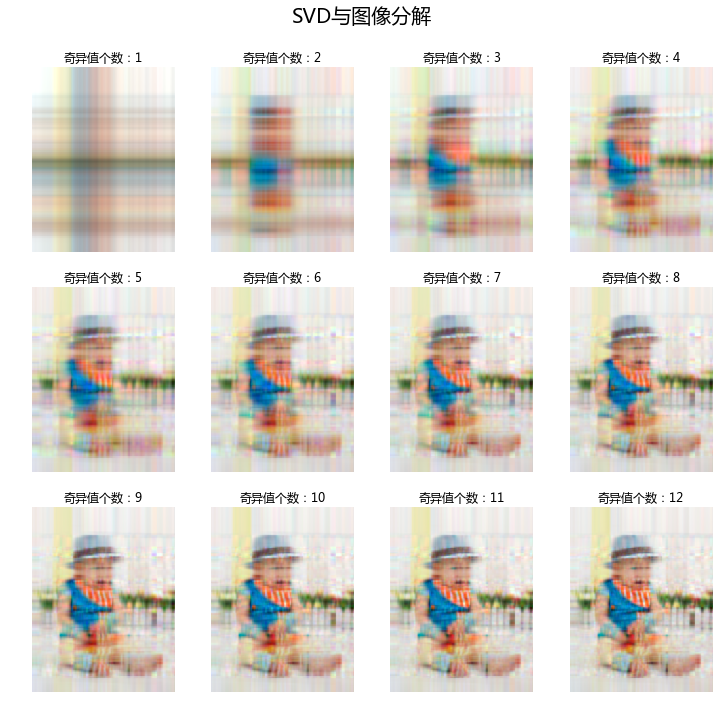

In [3]:
if __name__ == "__main__":
    A = Image.open("son.png", 'r')
    print A
    output_path = r'.\Pic'
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    a = np.array(A)
    print a.shape
    K = 50
    u_r, sigma_r, v_r = np.linalg.svd(a[:, :, 0])
    u_g, sigma_g, v_g = np.linalg.svd(a[:, :, 1])
    u_b, sigma_b, v_b = np.linalg.svd(a[:, :, 2])
    plt.figure(figsize=(10,10), facecolor='w')
    # mpl.rcParams['font.sans-serif'] = [u'simHei']
    # mpl.rcParams['axes.unicode_minus'] = False
    for k in range(1, K+1):
        print k
        R = restore1(sigma_r, u_r, v_r, k)
        G = restore1(sigma_g, u_g, v_g, k)
        B = restore1(sigma_b, u_b, v_b, k)
        I = np.stack((R, G, B), axis=2)
        Image.fromarray(I).save('%s\\svd_%d.png' % (output_path, k))
        if k <= 12:
            plt.subplot(3, 4, k)
            plt.imshow(I)
            plt.axis('off')
            plt.title(u'奇异值个数：%d' % k)
    plt.suptitle(u'SVD与图像分解', fontsize=20)
    plt.tight_layout(0.3, rect=(0, 0, 1, 0.92))
    # plt.subplots_adjust(top=0.9)
    plt.show()